In [ ]:
# BM20A6100 Project work Forecasting power for predicting temperature using multivariate data
# Emma Hirvonen, Helmi Toropainen, Jan Vymazal

# Import dataset with Pandas
import pandas as pd
file_path = "sample_data/DailyDelhiClimateTrain.csv"
climate_data = pd.read_csv(file_path, parse_dates=["date"])
climate_data = climate_data.set_index("date") # use date as index
print(climate_data.info())
print(climate_data.head())
print(climate_data.describe())
# Data consists of 4 variables for 1462 samples, no missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802

<Figure size 640x480 with 0 Axes>

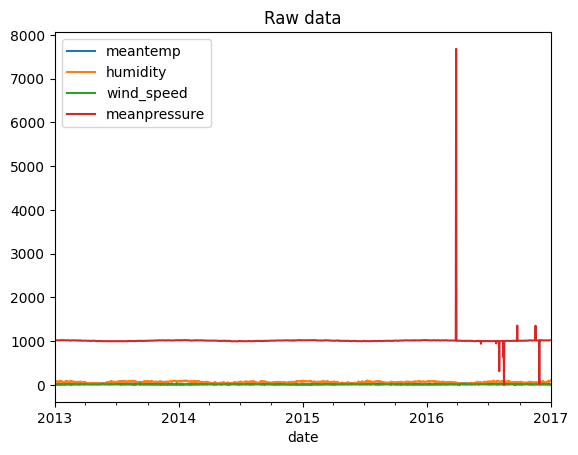

<Figure size 640x480 with 0 Axes>

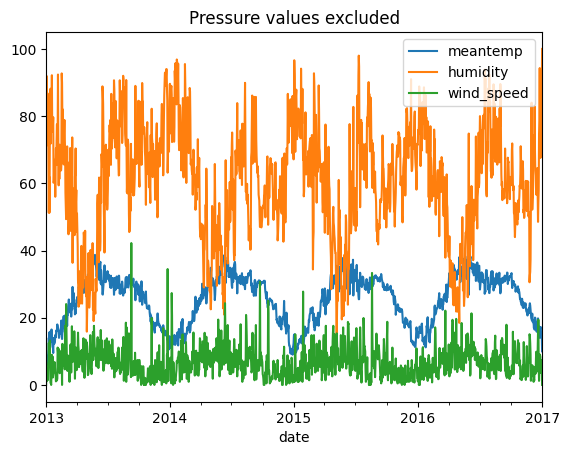

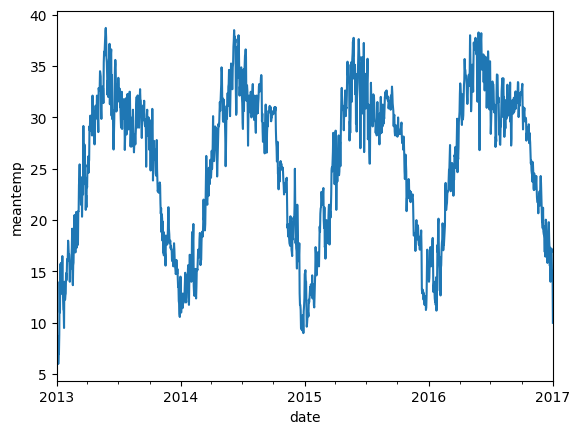

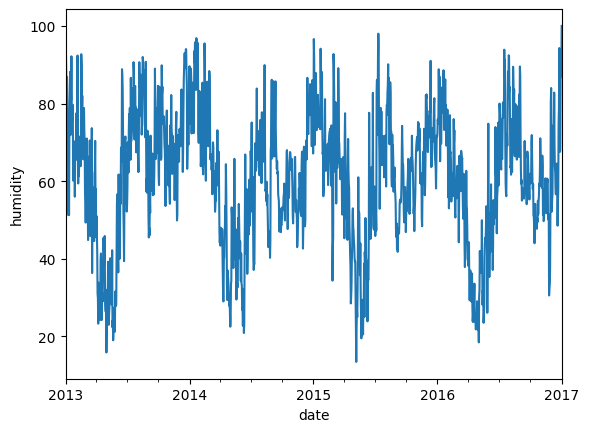

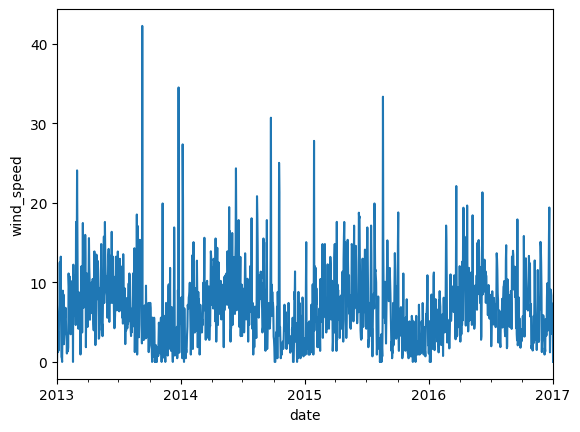

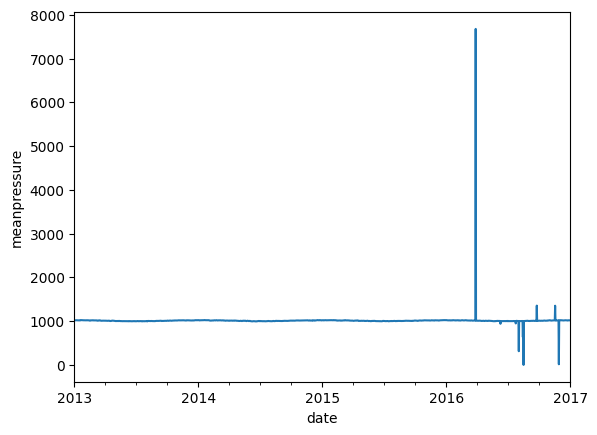

In [ ]:
# Visualise timerseries for all variables
import matplotlib.pyplot as plt

plt.figure()
climate_data.plot()
plt.title("Raw data")
plt.show()

plt.figure()
climate_data.drop("meanpressure", axis=1).plot()
plt.title("Pressure values excluded")
plt.show()

for var in climate_data.columns:
  plt.figure()
  climate_data[var].plot()
  plt.ylabel(var)
  plt.show()

In [ ]:
# remove outlier
print(climate_data[climate_data["meanpressure"] > 2000]) # outlier?
climate_data_clean = climate_data.copy()

t = pd.Timestamp(climate_data_clean[climate_data_clean["meanpressure"] > 2000].index.date[0]) # outlier date
i = climate_data_clean.index.get_loc(t) # outlier index

new_pressure = (climate_data_clean.iloc[i+1].get("meanpressure")+climate_data_clean.iloc[i-1].get("meanpressure"))/2 # average of prev and next value

climate_data_clean.loc[t, "meanpressure"] = new_pressure

             meantemp  humidity  wind_speed  meanpressure
date                                                     
2016-03-28  25.933333      52.8    6.546667   7679.333333


In [ ]:
import datetime

<Figure size 640x480 with 0 Axes>

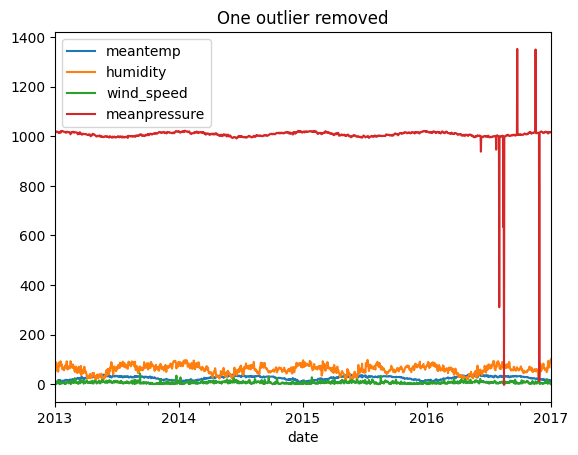

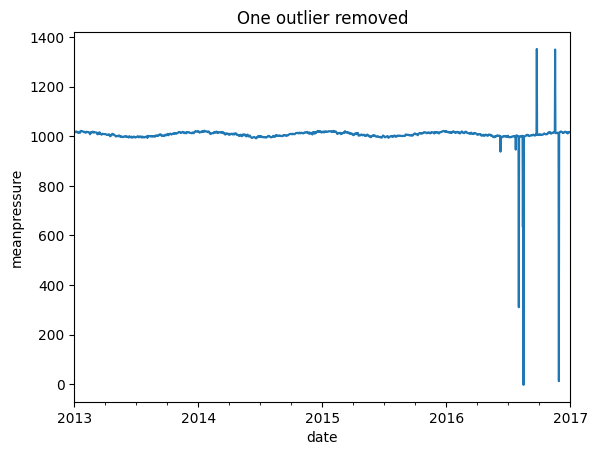

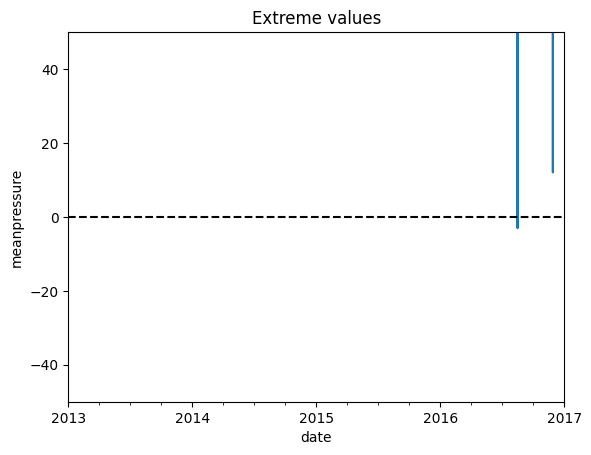

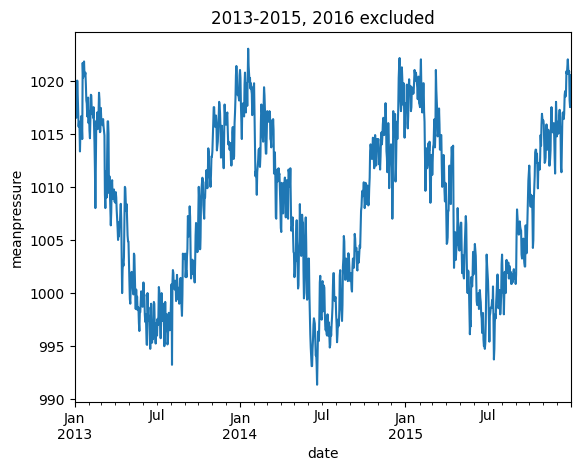

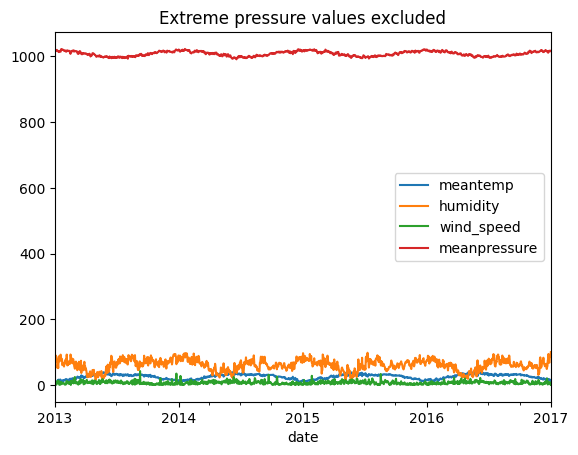

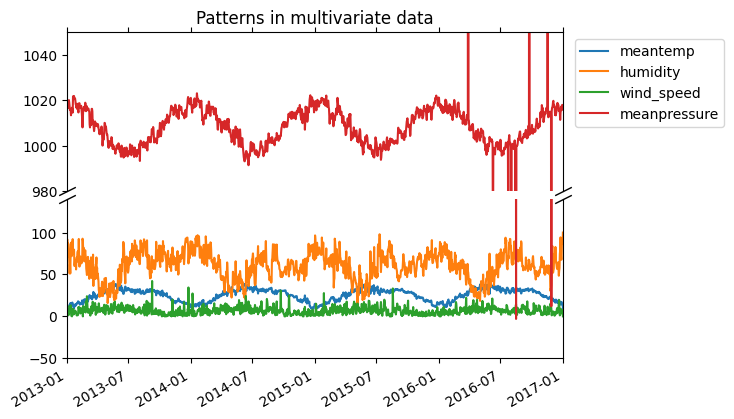

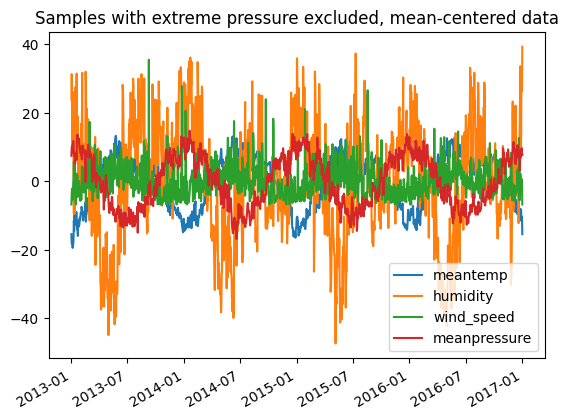

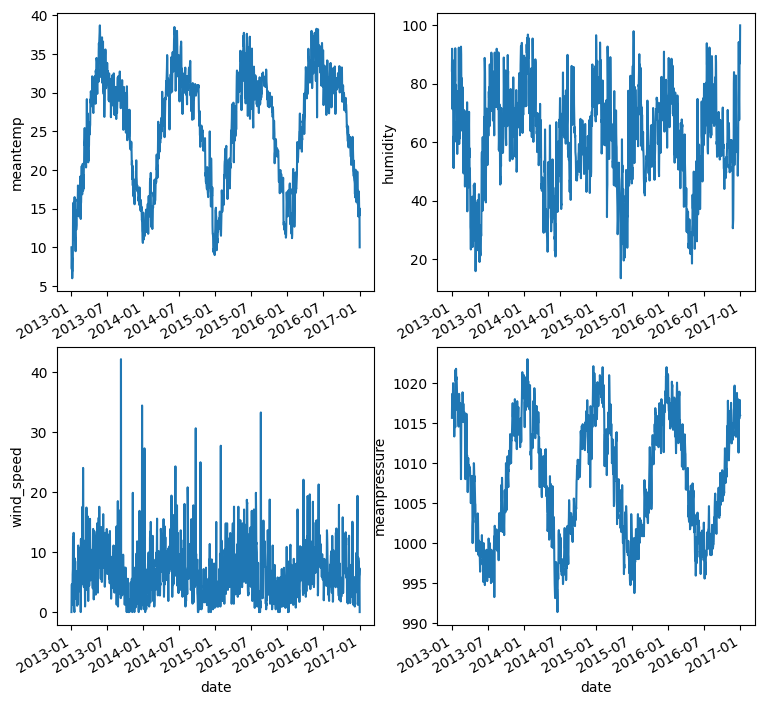

In [ ]:
# new plots without outlier
plt.figure()
climate_data_clean.plot()
plt.title("One outlier removed")
plt.show()

plt.figure()
climate_data_clean["meanpressure"].plot()
plt.ylabel("meanpressure")
plt.title("One outlier removed")
plt.show()

# negative pressure?
plt.figure()
climate_data["meanpressure"].plot()
plt.ylabel("meanpressure")
plt.axhline(y=0, color='k', linestyle='--')
plt.ylim(-50, 50)
plt.title("Extreme values")
plt.show()

# pressure values from 2013-01-01 to 2016-01-01 (2016 seems unreliable?)
plt.figure()
climate_data.iloc[0:365+365+365, 3].plot()
plt.ylabel("meanpressure")
plt.title("2013-2015, 2016 excluded")
plt.show()
# all values should be between ~990-1030?

# skip outlier values
climate_data.drop("meanpressure", axis=1).plot()
climate_data.query("990 < meanpressure < 1030")["meanpressure"].plot()
plt.legend()
plt.title("Extreme pressure values excluded")
plt.show()

# broken y-axis (matplotlib documentation)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)
plt_data = climate_data#.query("990 < meanpressure < 1030")
ax1.plot(plt_data)
ax1.set_ylim((980, 1050))
ax1.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax2.plot(plt_data)
ax2.set_ylim((-50, 140))
ax2.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax1.legend(plt_data.columns, bbox_to_anchor=(1.01, 1.0), loc='upper left')
ax1.title.set_text("Patterns in multivariate data")
fig.autofmt_xdate()
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.show()

# mean center data
plt.figure()
plt.plot(climate_data.query("990 < meanpressure < 1030") - climate_data.query("990 < meanpressure < 1030").mean())
plt.gcf().autofmt_xdate()
plt.legend(climate_data.columns)
plt.title("Samples with extreme pressure excluded, mean-centered data")
plt.show()

# subplot of all variables (no mean-centering)
plt.figure(figsize=(9, 9))
for i in range(4):
  plt.subplot(2,2,i+1)
  climate_data.query("990 < meanpressure < 1030").iloc[:, i].plot()
  plt.ylabel(climate_data.columns[i])
plt.show()


In [ ]:
# Remove outliers from meanpressure

dates = climate_data_clean.query("meanpressure < 990 or meanpressure > 1030").index.date

for date in dates:
  t = pd.Timestamp(date)
  i = climate_data_clean.index.get_loc(t)
  new_pressure = (climate_data_clean.iloc[i+1].get("meanpressure")+climate_data_clean.iloc[i-1].get("meanpressure"))/2 # average of prev and next value
  climate_data_clean.loc[t, "meanpressure"] = new_pressure

climate_data = climate_data_clean.copy()


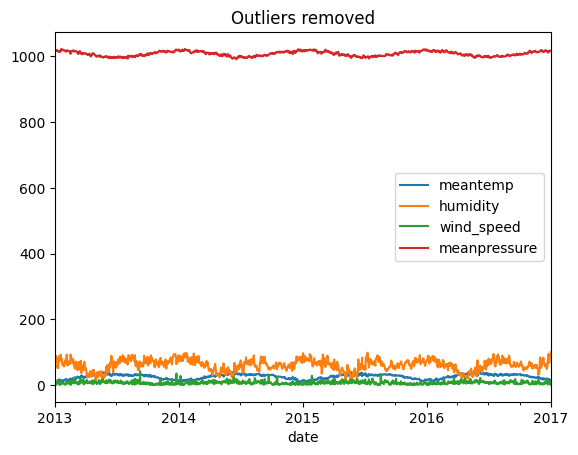

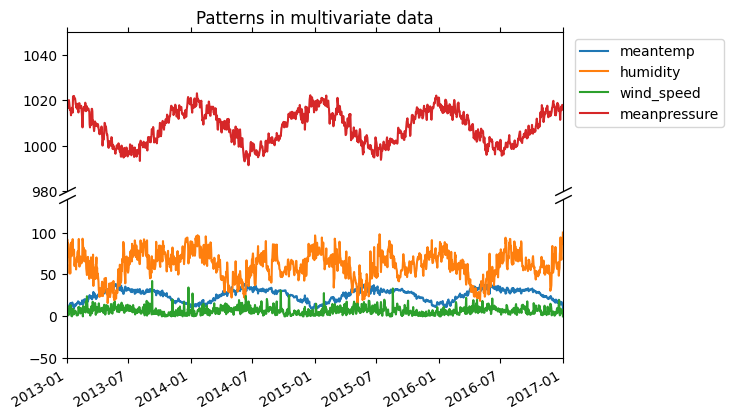

In [ ]:
# Outliers removed
climate_data_clean.plot()
plt.title("Outliers removed")
plt.show()

# broken y-axis (matplotlib documentation)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)
plt_data = climate_data_clean
ax1.plot(plt_data)
ax1.set_ylim((980, 1050))
ax1.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax2.plot(plt_data)
ax2.set_ylim((-50, 140))
ax2.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax1.legend(plt_data.columns, bbox_to_anchor=(1.01, 1.0), loc='upper left')
ax1.title.set_text("Patterns in multivariate data")
fig.autofmt_xdate()
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.show()

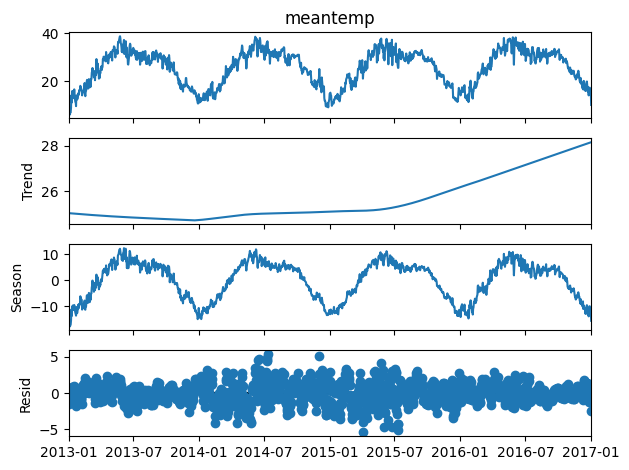

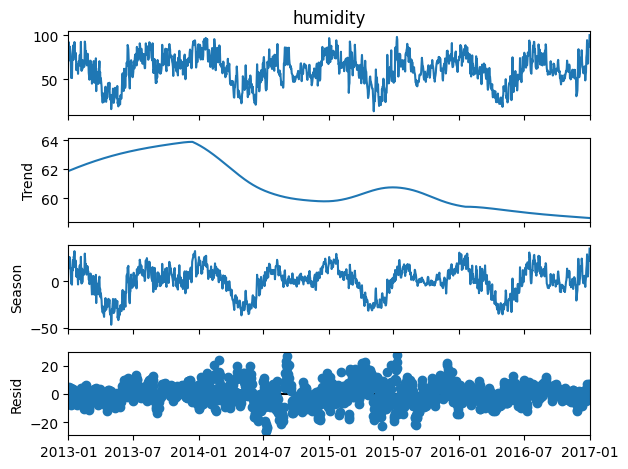

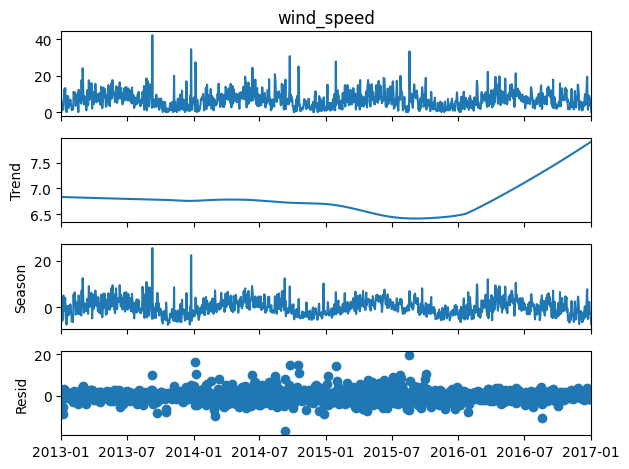

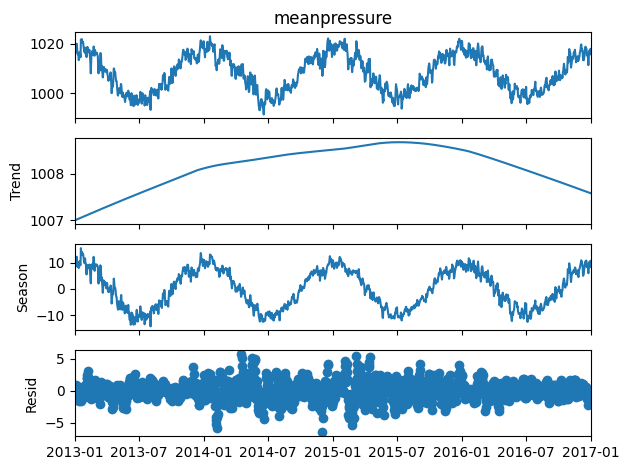

In [ ]:
#Time-series decomposition analysis in long-term trend, seasonality and residuals
#Period 365 because we measure once per day for multiple years
from statsmodels.tsa.seasonal import STL
stl = STL(climate_data["meantemp"], period=365 )
res = stl.fit()
fig = res.plot()

stl = STL(climate_data["humidity"], period=365)
res = stl.fit()
fig = res.plot()

stl = STL(climate_data["wind_speed"], period=365)
res = stl.fit()
fig = res.plot()

stl = STL(climate_data["meanpressure"], period=365)
res = stl.fit()
fig = res.plot()


Text(0.5, 1.0, 'Mean pressure autocorrelation')

<Figure size 640x480 with 0 Axes>

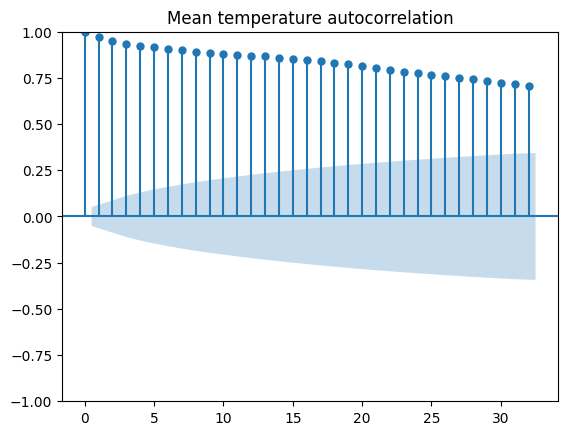

<Figure size 640x480 with 0 Axes>

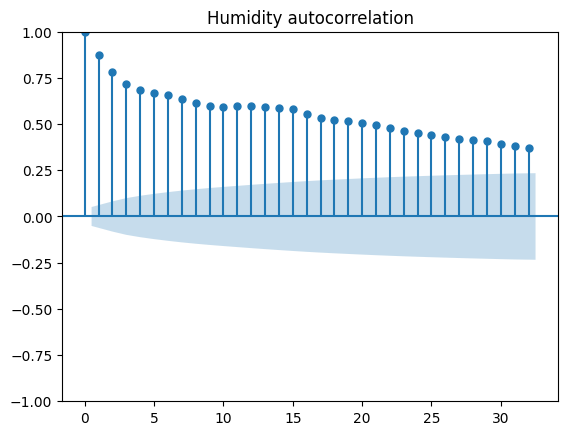

<Figure size 640x480 with 0 Axes>

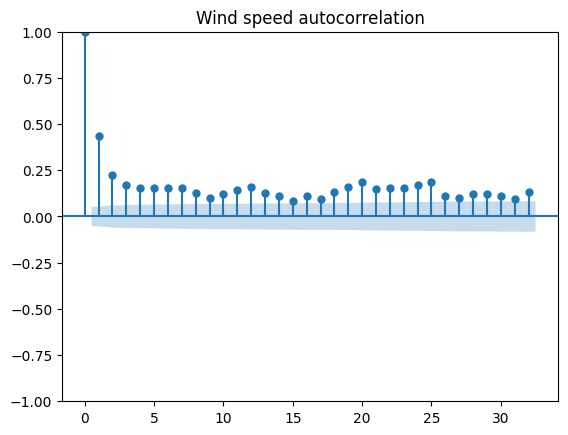

<Figure size 640x480 with 0 Axes>

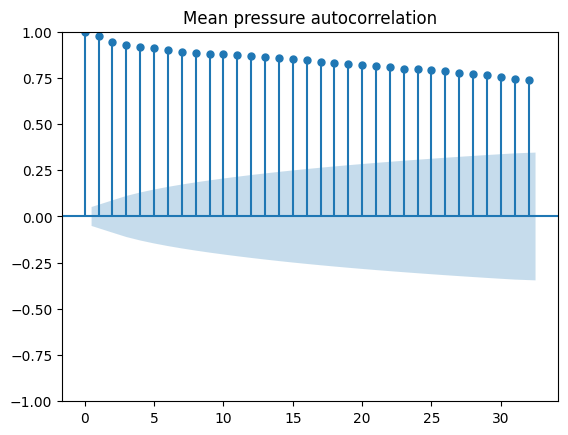

In [ ]:
#Autocorrelation analysis of the dataset
from statsmodels.graphics.tsaplots import plot_acf
plt.figure()
plot_acf(climate_data["meantemp"])
plt.title("Mean temperature autocorrelation")

plt.figure()
plot_acf(climate_data["humidity"])
plt.title("Humidity autocorrelation")

plt.figure()
plot_acf(climate_data["wind_speed"])
plt.title("Wind speed autocorrelation")

plt.figure()
plot_acf(climate_data["meanpressure"])
plt.title("Mean pressure autocorrelation")


In [ ]:
# Basline autoregressive model

import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import SGD, Adam
from tensorflow.keras.optimizers import Adam

In [ ]:
# Build the dataset
T =100
X = []
Y = []
series = climate_data['meantemp']
series = (series-series.mean())/series.std() # normalise
series = series.to_numpy()
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1362, 100) Y.shape (1362,)


In [ ]:
# Try autoregressive model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.001)
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5817 - val_loss: 0.2133
Epoch 2/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1867 - val_loss: 0.2082
Epoch 3/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1704 - val_loss: 0.1909
Epoch 4/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1595 - val_loss: 0.1826
Epoch 5/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1595 - val_loss: 0.1769
Epoch 6/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1527 - val_loss: 0.1716
Epoch 7/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1520 - val_loss: 0.1632
Epoch 8/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1540 - val_loss: 0.1593
Epoch 9/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1313 - val_loss: 0.1555
Epoch 10/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1176 - val_loss: 0.1513
Epoch 11/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1231 - val_loss: 0.1560
Epoch 12/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1349 - val_lo

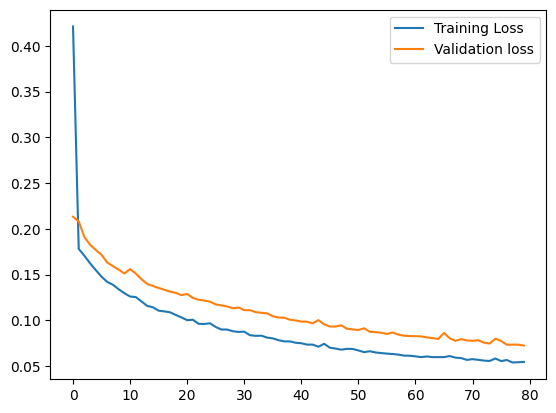

In [ ]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="Training Loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

In [ ]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array

  # Update predictions list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1) # shift everything one spot to the left, we replace it with the latest forecasted prediction. Multi-step predictions.
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

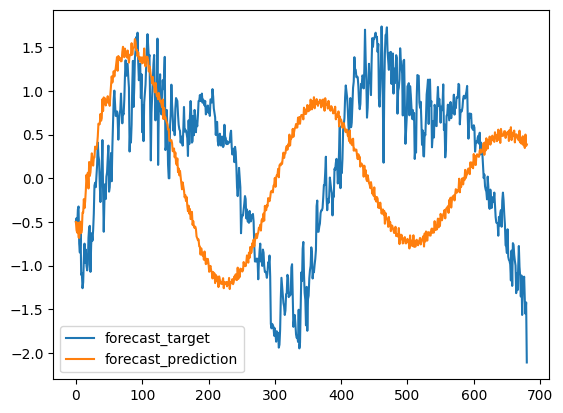

In [ ]:
plt.plot(validation_target, label="forecast_target")
plt.plot(validation_predictions, label="forecast_prediction")
plt.legend()
plt.show()